In [0]:
# 분석2 개요. kmeans - 비지도학습 군집분석. 분석1에서 유관하다고 도출된 독립변수들로 군집분석을 실행하여 종속변수를 유발하는 집합적 특성이 있는지 분석

In [0]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

# import visualisation api
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.pylab as pylab
from matplotlib import cm
import seaborn as sns

# bg theme
plt.style.use(['seaborn-whitegrid'])

# font
font_fname = 'C:/Users/Admin/AppData/Local/Microsoft/Windows/Fonts/NanumGothicCoding.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

# import ML with Statistics api
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
import patsy as pt
import pymc3 as pm

In [0]:
df = pd.read_csv('c:/lois/project/entireDB_2018 - for R.csv')

In [0]:
# 컬럼 설명: 행정자치구, 노인사고수, 노인중상이상수, 노인경상이하수, 노인인구수, 노인인구비율, 교통안전지표, 노인생활인구수, 도로연장, 전일평균속도, 도로안전지표수, 시장수, 노인보호구역수, 육교수

In [0]:
df

,gu,elder_ac_num,elder_hv_num,elder_lt_num,elder_po_num,elder_po_per,trans_sa_idx,elder_fpo_per,car_ro_len,car_ave_spd,road_si_num,market_num,elder_sz_num,ovp_num
0,gn,351,112,267,67085,12.25,68.53,13.77,101.3,24.5,1034,10,11,20
1,gd,242,106,157,58770,13.61,79.28,17.18,70.4,23.9,450,10,6,20
2,gb,246,102,155,58196,18.02,76.12,21.52,34.0,21.3,219,12,2,1
3,gs,210,95,133,79660,13.20,79.62,16.22,66.8,23.6,485,12,13,4
4,gw,182,68,123,72249,13.89,79.78,15.84,42.3,25.3,238,16,7,16
5,gj,133,48,87,45619,12.29,80.77,14.60,53.4,25.0,300,12,4,0
6,gr,242,101,154,61801,14.09,76.61,16.00,38.3,23.6,277,9,2,12
7,gc,143,65,86,35739,14.07,81.90,14.67,42.1,23.5,228,9,4,14
8,nw,245,101,155,77096,14.06,78.82,17.07,67.9,24.0,580,6,6,7
9,db,190,83,117,55964,16.38,81.28,20.73,28.6,21.9,318,7,2,0


In [0]:
# 분석1(negative binomail regression)에서 종속변수(노인사고수)와 관련이 있다고 도출된 독립변수들만 모아 새 데이터프레임 생성
df_ac = df[['elder_po_per', 'trans_sa_idx', 'elder_fpo_per']]

In [0]:
# 정규화. 여기서는 minmax normalisation 사용
min_max_scaler = MinMaxScaler()
minmax_df_ac = min_max_scaler.fit(df_ac)
print(minmax.data_max_)

[3.7300e+02 1.5100e+02 2.6700e+02 8.1364e+04 1.8020e+01 8.1900e+01
 2.1520e+01 1.0130e+02 2.6600e+01 1.0340e+03 3.8000e+01 1.3000e+01
 3.2000e+01]


In [0]:
# 정규화된 데이터를 바탕으로 새 데이터프레임 생성
scaled_df_ac = min_max_scaler.transform(df_ac)
scaled_df_ac = pd.DataFrame(scaled_df_ac, columns=df_ac.columns, index=list(df_ac.index.values))
scaled_df_ac

,elder_po_per,trans_sa_idx,elder_fpo_per
0,0.028620,0.105686,0.049080
1,0.257576,0.824749,0.467485
2,1.000000,0.613378,1.000000
3,0.188552,0.847492,0.349693
4,0.304714,0.858194,0.303067
5,0.035354,0.924415,0.150920
6,0.338384,0.646154,0.322699
7,0.335017,1.000000,0.159509
8,0.333333,0.793980,0.453988
9,0.723906,0.958528,0.903067


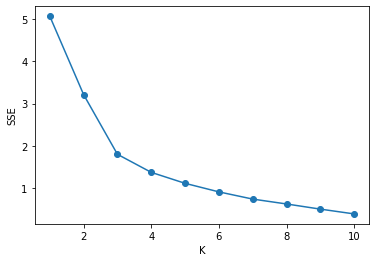

In [0]:
# elbow: kmeans 군집분석을 위해 몇 개의 클러스터로 나누어야 하는지 검토. 아래와 같은 경우는 변화의 폭이 가장 큰 3을 클러스터의 수로 설정
def elbow(K):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
        km.fit(K)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K') # K값
    plt.ylabel('SSE') # 오차제곱근
    plt.show()

elbow(scaled_df_ac)

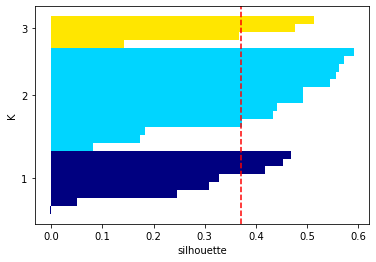

In [0]:
# silhouette: elbow에서 도출된 클러스터 갯수의 타당성 검증
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('silhouette')
    plt.show()

k = 3

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(scaled_df_ac)
plotSilhouette(scaled_df_ac, y_km)

In [0]:
# elbow와 silhouette에서 도출된 값을 바탕으로 kmeans 군집분석 실행
kmeans = KMeans(n_clusters=3).fit(scaled_df_ac)
kmeans.labels_

array([1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 0,
       0, 1, 0])

In [0]:
# 무엇이 어떤 클러스터에 속하는지 원활히 파악하기 위해 'cluster_id' 컬럼 생성
scaled_df_ac['cluster_id'] = kmeans.labels_

In [0]:
# 노인사고수와 유관한 독립변수들의 상관관계 및 집합적 특성을 파악하기 위한 kmeans 군집분석 진행

Text(0.5, 1, 'scaled_df_ac~elder_po_per+trans_sa_idx k=3')

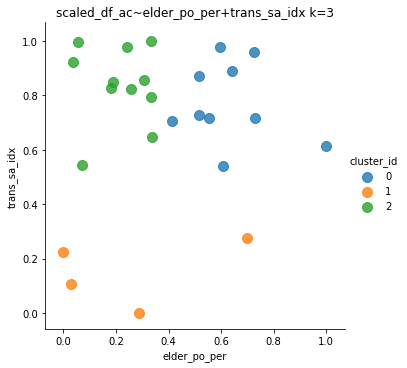

In [0]:
sns.lmplot('elder_po_per', 'trans_sa_idx', data=scaled_df_ac, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_ac~elder_po_per+trans_sa_idx k=3')

Text(0.5, 1, 'scaled_df_ac~elder_po_per+elder_fpo_per k=3')

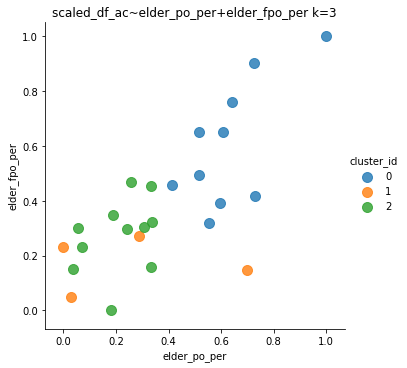

In [0]:
sns.lmplot('elder_po_per', 'elder_fpo_per', data=scaled_df_ac, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_ac~elder_po_per+elder_fpo_per k=3')

Text(0.5, 1, 'scaled_df_ac~trans_sa_idx+elder_fpo_per k=3')

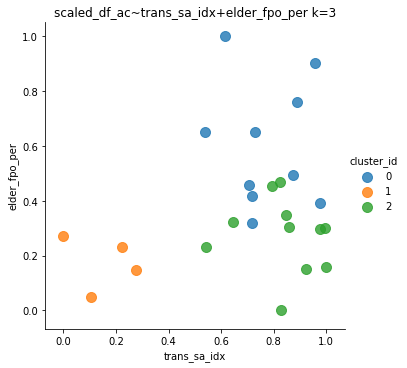

In [0]:
sns.lmplot('trans_sa_idx', 'elder_fpo_per', data=scaled_df_ac, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_ac~trans_sa_idx+elder_fpo_per k=3')

In [0]:
# 분석1(negative binomail regression)에서 종속변수(노인중상이상수)와 관련이 있다고 도출된 독립변수들만 모아 새 데이터프레임 생성
df_hv = df[['elder_po_per', 'trans_sa_idx']]

In [0]:
# 정규화. 여기서는 minmax normalisation 사용
min_max_scaler = MinMaxScaler()
minmax_df_hv = min_max_scaler.fit(df_hv)
print(minmax.data_max_)

[3.7300e+02 1.5100e+02 2.6700e+02 8.1364e+04 1.8020e+01 8.1900e+01
 2.1520e+01 1.0130e+02 2.6600e+01 1.0340e+03 3.8000e+01 1.3000e+01
 3.2000e+01]


In [0]:
# 정규화된 데이터를 바탕으로 새 데이터프레임 생성
scaled_df_hv = min_max_scaler.transform(df_hv)
scaled_df_hv = pd.DataFrame(scaled_df_hv, columns=df_hv.columns, index=list(df_hv.index.values))
scaled_df_hv

,elder_po_per,trans_sa_idx
0,0.028620,0.105686
1,0.257576,0.824749
2,1.000000,0.613378
3,0.188552,0.847492
4,0.304714,0.858194
5,0.035354,0.924415
6,0.338384,0.646154
7,0.335017,1.000000
8,0.333333,0.793980
9,0.723906,0.958528


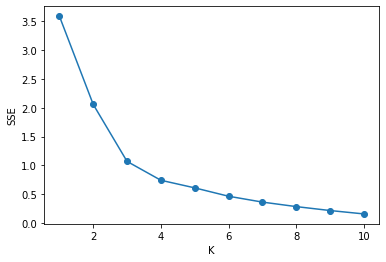

In [0]:
# elbow: kmeans 군집분석을 위해 몇 개의 클러스터로 나누어야 하는지 검토. 아래와 같은 경우는 변화의 폭이 가장 큰 3을 클러스터의 수로 설정
def elbow(K):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
        km.fit(K)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K') # K값
    plt.ylabel('SSE') # 오차제곱근
    plt.show()

elbow(scaled_df_hv)

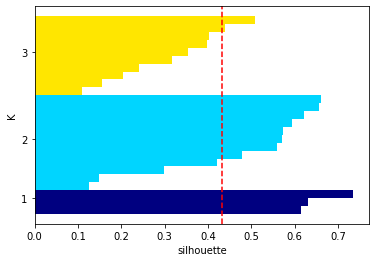

In [0]:
# silhouette. elbow에서 도출된 클러스터 갯수의 타당성 검증
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('silhouette')
    plt.show()

k = 3

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(scaled_df_hv)
plotSilhouette(scaled_df_hv, y_km)

In [0]:
# elbow와 silhouette에서 도출된 값을 바탕으로 kmeans 군집분석 실행
kmeans = KMeans(n_clusters=3).fit(scaled_df_hv)
kmeans.labels_

array([1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2,
       2, 2, 2])

In [0]:
# 무엇이 어떤 클러스터에 속하는지 원활히 파악하기 위해 'cluster_id' 컬럼 생성
scaled_df_hv['cluster_id'] = kmeans.labels_

In [0]:
# 노인중상이상수와 유관한 독립변수들의 상관관계 및 집합적 특성을 파악하기 위한 kmeans 군집분석 진행

Text(0.5, 1, 'scaled_df_hv~elder_po_per+trans_sa_idx k=3')

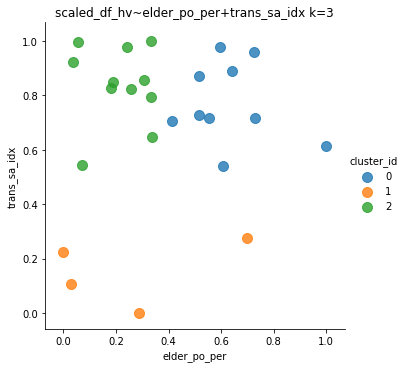

In [0]:
sns.lmplot('elder_po_per', 'trans_sa_idx', data=scaled_df_ac, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_hv~elder_po_per+trans_sa_idx k=3')

In [0]:
# 분석1(negative binomail regression)에서 종속변수(노인경상이하수)와 관련이 있다고 도출된 독립변수들만 모아 새 데이터프레임 생성
df_lt = df[['trans_sa_idx', 'elder_fpo_per', 'car_ave_spd', 'road_si_num', 'ovp_num']]

In [0]:
# 정규화. 여기서는 minmax normalisation 사용
min_max_scaler = MinMaxScaler()
minmax_df_lt = min_max_scaler.fit(df_lt)
print(minmax.data_max_)

[3.7300e+02 1.5100e+02 2.6700e+02 8.1364e+04 1.8020e+01 8.1900e+01
 2.1520e+01 1.0130e+02 2.6600e+01 1.0340e+03 3.8000e+01 1.3000e+01
 3.2000e+01]


In [0]:
# 정규화된 데이터를 바탕으로 새 데이터프레임 생성
scaled_df_lt = min_max_scaler.transform(df_lt)
scaled_df_lt = pd.DataFrame(scaled_df_lt, columns=df_lt.columns, index=list(df_lt.index.values))
scaled_df_lt

,trans_sa_idx,elder_fpo_per,car_ave_spd,road_si_num,ovp_num
0,0.105686,0.049080,0.704225,1.000000,0.62500
1,0.824749,0.467485,0.619718,0.313749,0.62500
2,0.613378,1.000000,0.253521,0.042303,0.03125
3,0.847492,0.349693,0.577465,0.354877,0.12500
4,0.858194,0.303067,0.816901,0.064630,0.50000
5,0.924415,0.150920,0.774648,0.137485,0.00000
6,0.646154,0.322699,0.577465,0.110458,0.37500
7,1.000000,0.159509,0.563380,0.052879,0.43750
8,0.793980,0.453988,0.633803,0.466510,0.21875
9,0.958528,0.903067,0.338028,0.158637,0.00000


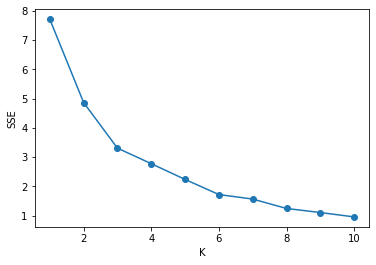

In [0]:
# elbow: kmeans 군집분석을 위해 몇 개의 클러스터로 나누어야 하는지 검토. 아래와 같은 경우는 변화의 폭이 가장 큰 3을 클러스터의 수로 설정
def elbow(K):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
        km.fit(K)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K') # K값
    plt.ylabel('SSE') # 오차제곱근
    plt.show()

elbow(scaled_df_lt)

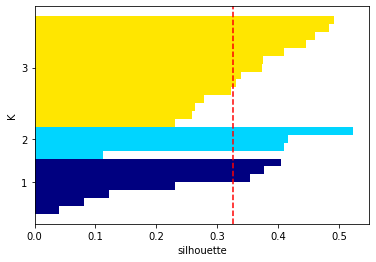

In [0]:
# silhouette. elbow에서 도출된 클러스터 갯수의 타당성 검증
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('silhouette')
    plt.show()

k = 3

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(scaled_df_lt)
plotSilhouette(scaled_df_lt, y_km)

In [0]:
# elbow와 silhouette에서 도출된 값을 바탕으로 kmeans 군집분석 실행
kmeans = KMeans(n_clusters=3).fit(scaled_df_lt)
kmeans.labels_

array([2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1,
       1, 1, 1])

In [0]:
# 무엇이 어떤 클러스터에 속하는지 원활히 파악하기 위해 'cluster_id' 컬럼 생성
scaled_df_lt['cluster_id'] = kmeans.labels_

In [0]:
# 노인경상이하수와 유관한 독립변수들의 상관관계 및 집합적 특성을 파악하기 위한 kmeans 군집분석 진행

Text(0.5, 1, 'scaled_df_lt~trans_sa_idx+elder_fpo_per k=3')

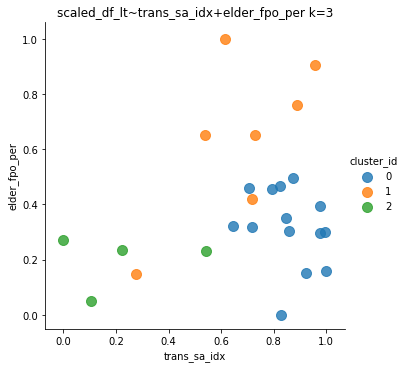

In [0]:
sns.lmplot('trans_sa_idx', 'elder_fpo_per', data=scaled_df_lt, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_lt~trans_sa_idx+elder_fpo_per k=3')

Text(0.5, 1, 'scaled_df_lt~trans_sa_idx+car_ave_spd k=3')

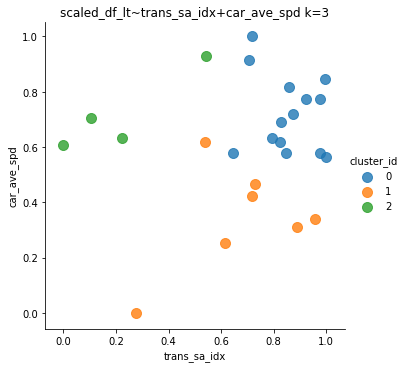

In [0]:
sns.lmplot('trans_sa_idx', 'car_ave_spd', data=scaled_df_lt, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_lt~trans_sa_idx+car_ave_spd k=3')

Text(0.5, 1, 'scaled_df_lt~trans_sa_idx+road_si_num k=3')

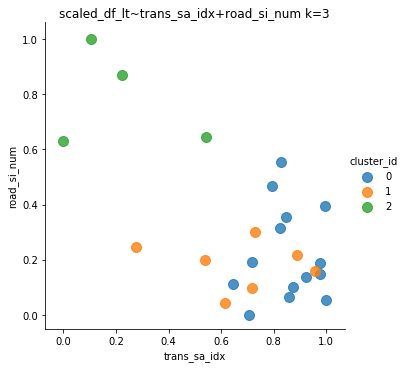

In [0]:
sns.lmplot('trans_sa_idx', 'road_si_num', data=scaled_df_lt, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_lt~trans_sa_idx+road_si_num k=3')

Text(0.5, 1, 'scaled_df_lt~trans_sa_idx+ovp_num k=3')

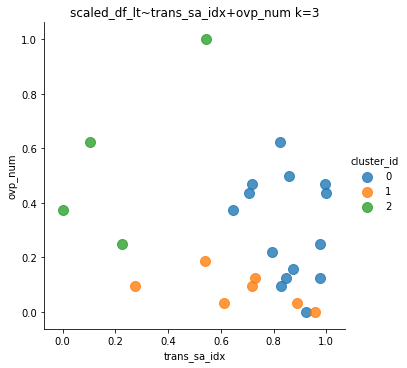

In [0]:
sns.lmplot('trans_sa_idx', 'ovp_num', data=scaled_df_lt, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_lt~trans_sa_idx+ovp_num k=3')

Text(0.5, 1, 'scaled_df_lt~elder_fpo_per+car_ave_spd k=3')

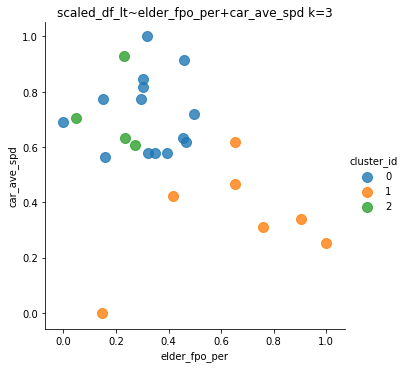

In [0]:
sns.lmplot('elder_fpo_per', 'car_ave_spd', data=scaled_df_lt, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_lt~elder_fpo_per+car_ave_spd k=3')

Text(0.5, 1, 'scaled_df_lt~elder_fpo_per+road_si_num k=3')

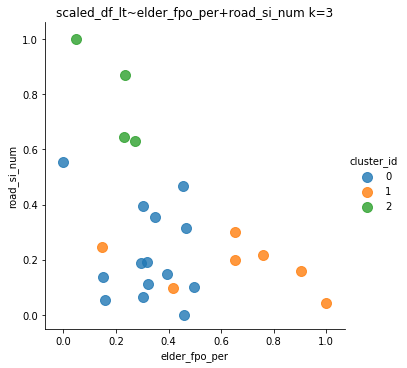

In [0]:
sns.lmplot('elder_fpo_per', 'road_si_num', data=scaled_df_lt, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_lt~elder_fpo_per+road_si_num k=3')

Text(0.5, 1, 'scaled_df_lt~elder_fpo_per+ovp_num k=3')

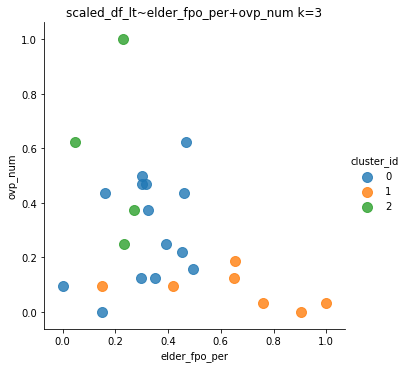

In [0]:
sns.lmplot('elder_fpo_per', 'ovp_num', data=scaled_df_lt, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_lt~elder_fpo_per+ovp_num k=3')

Text(0.5, 1, 'scaled_df_lt~car_ave_spd+road_si_num k=3')

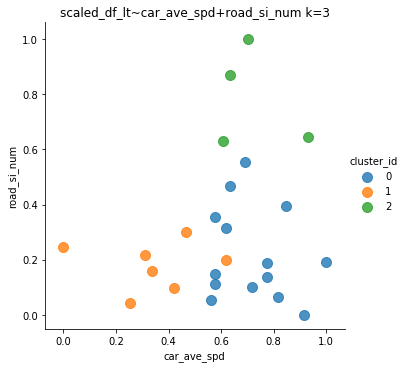

In [0]:
sns.lmplot('car_ave_spd', 'road_si_num', data=scaled_df_lt, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_lt~car_ave_spd+road_si_num k=3')

Text(0.5, 1, 'scaled_df_lt~car_ave_spd+ovp_num k=3')

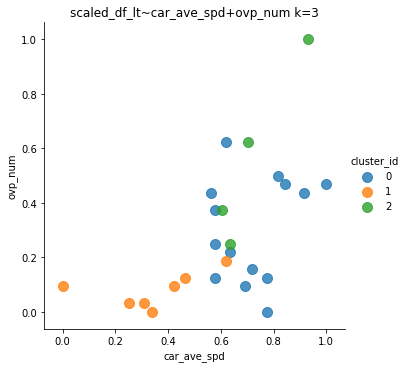

In [0]:
sns.lmplot('car_ave_spd', 'ovp_num', data=scaled_df_lt, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_lt~car_ave_spd+ovp_num k=3')

Text(0.5, 1, 'scaled_df_lt~road_si_num+ovp_num k=3')

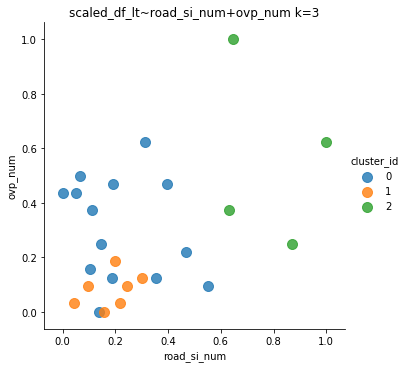

In [0]:
sns.lmplot('road_si_num', 'ovp_num', data=scaled_df_lt, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('scaled_df_lt~road_si_num+ovp_num k=3')

In [0]:
# 분석 종료